In [ ]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.




Advanced Profiling for column: 'Test Numeric Data'
--------------------------------------------------

Basic Descriptive Statistics:
count     13.000000
mean      26.923077
std       24.854448
min       -5.000000
25%       15.000000
50%       22.000000
75%       30.000000
max      100.000000
dtype: float64

Percentiles:
0.01    -3.2
0.05     4.0
0.25    15.0
0.50    22.0
0.75    30.0
0.95    64.0
0.99    92.8
dtype: float64

Distribution Analysis:
Skewness: 2.2417
Kurtosis: 6.8222

Shapiro-Wilk Normality Test:
  Statistic: 0.7733, P-value: 0.0033
  Data does not appear to be normally distributed (alpha=0.05).


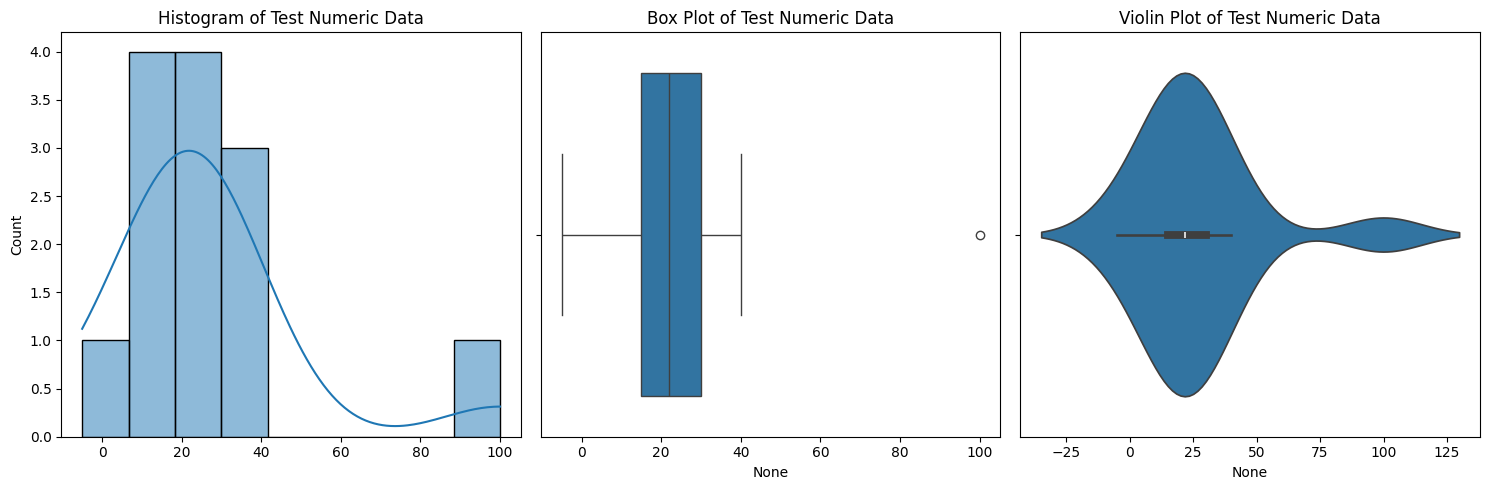


Outliers detected using IQR (threshold=1.5) for 'Test Numeric Data':
11    100
dtype: int64

Outliers detected using Z-score (threshold=3) for 'Test Numeric Data':
11    100
dtype: int64

Outliers detected using Isolation Forest (contamination='auto') for 'Test Numeric Data':
10     40
11    100
12     -5
dtype: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

def advanced_numeric_profiling(data: pd.Series, column_name: str):
    """Performs advanced data profiling for a numeric Pandas Series."""
    print(f"Advanced Profiling for column: '{column_name}'")
    print("-" * 50)

    # 1. Basic Descriptive Statistics
    print("\nBasic Descriptive Statistics:")
    print(data.describe())

    # 2. Percentiles
    print("\nPercentiles:")
    print(data.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]))

    # 3. Distribution Analysis
    print("\nDistribution Analysis:")
    print(f"Skewness: {data.skew():.4f}")
    print(f"Kurtosis: {data.kurt():.4f}")

    # Normality Test (Shapiro-Wilk - good for smaller samples)
    if len(data) < 5000:
        shapiro_test = stats.shapiro(data)
        print(f"\nShapiro-Wilk Normality Test:")
        print(f"  Statistic: {shapiro_test.statistic:.4f}, P-value: {shapiro_test.pvalue:.4f}")
        if shapiro_test.pvalue > 0.05:
            print("  Data appears to be normally distributed (alpha=0.05).")
        else:
            print("  Data does not appear to be normally distributed (alpha=0.05).")
    else:
        print("\nShapiro-Wilk test skipped for large sample size.")

    # Visualization
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {column_name}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=data)
    plt.title(f'Box Plot of {column_name}')

    plt.subplot(1, 3, 3)
    sns.violinplot(x=data)
    plt.title(f'Violin Plot of {column_name}')

    plt.tight_layout()
    plt.show()

def detect_outliers_iqr(data: pd.Series, column_name: str, threshold=1.5):
    """Detects outliers using the IQR method."""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"\nOutliers detected using IQR (threshold={threshold}) for '{column_name}':")
    print(outliers)
    return outliers

def detect_outliers_zscore(data: pd.Series, column_name: str, threshold=3):
    """Detects outliers using the Z-score method."""
    z = np.abs(stats.zscore(data))
    outliers = data[z > threshold]
    print(f"\nOutliers detected using Z-score (threshold={threshold}) for '{column_name}':")
    print(outliers)
    return outliers

def detect_outliers_isolation_forest(data: pd.Series, column_name: str, contamination='auto'):
    """Detects outliers using the Isolation Forest algorithm."""
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(data.values.reshape(-1, 1))
    outlier_scores = model.decision_function(data.values.reshape(-1, 1))
    outlier_mask = model.predict(data.values.reshape(-1, 1))
    outliers = data[outlier_mask == -1]
    print(f"\nOutliers detected using Isolation Forest (contamination='{contamination}') for '{column_name}':")
    print(outliers)
    return outliers

if __name__ == '__main__':
    # Sample Data
    numeric_data = pd.Series([10, 12, 15, 18, 20, 22, 25, 28, 30, 35, 40, 100, -5])
    column_name = "Test Numeric Data"

    # Perform advanced profiling
    advanced_numeric_profiling(numeric_data, column_name)

    # Detect outliers using different methods
    outliers_iqr = detect_outliers_iqr(numeric_data, column_name)
    outliers_zscore = detect_outliers_zscore(numeric_data, column_name)
    outliers_iforest = detect_outliers_isolation_forest(numeric_data, column_name)